# Title

Indian Companies Initial Startup Capital Analysis

# Project Description

Team niece has been tasked to set out to understand the problem, the indian start up terrain and how best a new business will attract rom investors and propose working course of action.



# Hypothesis


# Null Hypothesis, HO


There are no exact key factors that correlate with the exact amount of funding contributed by the investors.

# AlternativeHypothesis, H1

There are exact key factors that correlate with the exact amount of funding contributed by investors.

# Questions

1. Which company has the highest amount of funds?
2. Which location has the minimum startup funds?
3. In which sector has the top 10 investors.
4. How much did the investors contributed in Delhi and Mumbai?
5. How many companies received an amount greater than or equal to the average amount?

# Importation

Here is the section to import all the packages/libraries that will be used through this notebook.

In [1]:
# Data handling
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')


# Vizualisation (Matplotlib, Plotly, Seaborn, etc. )
import seaborn as sns
import matplotlib.pyplot as plt

# EDA (pandas-profiling, etc. )
...

# Feature Processing (Scikit-learn processing, etc. )
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

# Machine Learning (Scikit-learn Estimators, Catboost, LightGBM, etc. )
...

# Hyperparameters Fine-tuning (Scikit-learn hp search, cross-validation, etc. )
...

# Other packages

C:\Users\asant\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Ellipsis

# Data Loading

Here is the section to load the datasets (train, eval, test) and the additional files

In [2]:
sheet1=pd.read_csv("startup_funding2018.csv")
sheet2=pd.read_csv("startup_funding2019.csv")
sheet3=pd.read_csv("startup_funding2020.csv")
sheet4=pd.read_csv("startup_funding2021.csv")

# Exploratory Data Analysis: EDA

Here is the section to inspect the datasets in depth, present it, make hypotheses and think the cleaning, processing and features creation.

# Dataset overview

Have a look at the loaded datsets using the following methods: .head(), .info()

In [3]:
# #checking the shape of each file
print(sheet1.shape,sheet2.shape,sheet3.shape,sheet4.shape)

(526, 6) (89, 9) (1055, 10) (1209, 9)


In [4]:
sheet1.head(2)

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...


In [5]:
sheet2.head(2)

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C


In [6]:
sheet3.head(2)

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Unnamed: 9
0,Aqgromalin,2019,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,"$200,000",NaN,NaN
1,Krayonnz,2019,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,"$100,000",Pre-seed,NaN


In [7]:
sheet4.head(2)

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",NaN


# Issues with the data

 1. column names of sheet1 are different from the others
 2. sheet3 has an unnecessary column('Unnamed: 9')
 3. sheet1 doesn't have columns Founders,Investor and Founded.
 4. sheet1 amount column has rupees, dollars, commas and is a string
 5. amount column of other sheets have dollars, commas and is a string
 6. there are null values in the founded, headquater, sector and stage columns
 7. headquater column for sheet1 has more information
 8. for the sector column, the values are different in all
 9. amount column has null values
 10. datatypes are mostly object

 # How we intend to handle each issue identified
 
1. change column names of sheet1 to match the others
2. drop unnecessary column in sheet3
3. add missing columns to sheet1 with null values
4. convert sheet1 amount column to dollars in float
5. convert amount of other sheets to dollars in float
6. we'll leave the null values since they are not numbers
7. separate by commas and keep only the first word in headquater column for sheet1 
8. make the values similar for example: 8. "Ecommerce" and "E-Commerce Platforms" should be "E-commerce"
9. replace null values in amount column by calculating the mean or median
10. change datatypes accordingly for each column

 

In [8]:
sheet2['Sector'].unique()

array(['Ecommerce', 'Edtech', 'Interior design', 'AgriTech', 'Technology',
       'SaaS', 'AI & Tech', 'E-commerce', 'E-commerce & AR', 'Fintech',
       'HR tech', 'Food tech', 'Health', 'Healthcare', 'Safety tech',
       'Pharmaceutical', 'Insurance technology', 'AI', 'Foodtech', 'Food',
       'IoT', 'E-marketplace', 'Robotics & AI', 'Logistics', 'Travel',
       'Manufacturing', 'Food & Nutrition', 'Social Media', nan,
       'E-Sports', 'Cosmetics', 'B2B', 'Jewellery', 'B2B Supply Chain',
       'Games', 'Food & tech', 'Accomodation', 'Automotive tech',
       'Legal tech', 'Mutual Funds', 'Cybersecurity', 'Automobile',
       'Sports', 'Healthtech', 'Yoga & wellness', 'Virtual Banking',
       'Transportation', 'Transport & Rentals',
       'Marketing & Customer loyalty', 'Infratech', 'Hospitality',
       'Automobile & Technology', 'Banking'], dtype=object)

# Verify Data Quality

The data is dirty and needs a lot of cleaning before we can use it. It also has a lot of null values. So the quality is low.

# Data Cleaning

1. change column names of sheet1 to match the others

In [9]:
#changing column names
sheet1.rename(columns = {'Company Name':'Company/Brand', 'Industry':'Sector',
                              'Round/Series':'Stage', 'Amount':'Amount($)',
                        'Location':'HeadQuarter', 'About Company':'What it does'}, inplace = True)

2. drop unnecessary column in sheet3

In [10]:
sheet3.drop(columns=['Unnamed: 9'], axis=1, inplace = True)

3. add missing columns to sheet1 with null values

In [11]:
sheet1["Founded"] = np.nan
sheet1["Founders"] = np.nan
sheet1["Investor"] = np.nan


4. convert sheet1 amount column to dollars in float

In [15]:
def amountCleaner(sheet):
    sheet['Amount($)'] = sheet['Amount($)'].apply(lambda x: str(x).replace('—','NaN').replace(',','').replace('Undisclosed','NaN').replace('Upsparks','NaN').replace('Series C','NaN').replace('undisclosed','NaN').replace('ah! Ventures','NaN').replace('Pre-series A','NaN').replace('ITO Angel Network LetsVenture','NaN').replace('JITO Angel Network LetsVenture','NaN').replace('Seed','NaN').replace('JNaN','NaN').replace('800000000 to 850000000','825000000').replace('Undiclsosed','').replace('887000 23000000','11943500').replace('Undislosed','NaN').replace('$',''))
amountCleaner(sheet1)

#convert rupees to dollars if it has rupees sign
sheet1['Amount($)'] = sheet1['Amount($)'].apply(
    lambda x: float(str(x).replace('₹',''))*0.012 if '₹' in x
else x) 


In [16]:
amountCleaner(sheet2)
amountCleaner(sheet3)
amountCleaner(sheet4)

5. convert amount of other sheets to dollars in float

In [17]:
sheet1['Amount($)'] = sheet1['Amount($)'].replace('NaN',np.nan).replace('nan',np.nan)
sheet2['Amount($)'] = sheet2['Amount($)'].replace('NaN',np.nan).replace('nan',np.nan)
sheet3['Amount($)'] = sheet3['Amount($)'].replace('NaN',np.nan).replace('nan',np.nan)
sheet4['Amount($)'] = sheet4['Amount($)'].replace('NaN',np.nan).replace('nan',np.nan)
sheet1['Amount($)'] = pd.to_numeric(sheet1['Amount($)'], downcast = 'float')
sheet2['Amount($)'] = pd.to_numeric(sheet2['Amount($)'], downcast = 'float')
sheet3['Amount($)'] = pd.to_numeric(sheet3['Amount($)'], downcast = 'float')
sheet4['Amount($)'] = pd.to_numeric(sheet4['Amount($)'], downcast = 'float')




7. separate by commas and keep only the first word in headquater column for sheet1

In [18]:
sheet1[['HeadQuarter','s','f']] = sheet1['HeadQuarter'].str.split(', ',expand=True)
sheet1.drop(columns=['s','f'], axis=1, inplace = True)

In [19]:
sheet1.head(1)

,Company/Brand,Sector,Stage,Amount($),HeadQuarter,What it does,Founded,Founders,Investor
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000.0,Bangalore,"TheCollegeFever is a hub for fun, fiesta and f...",NaN,NaN,NaN




8. make the values similar for example: 8. "Ecommerce" and "E-Commerce Platforms" should be "E-commerce"

In [20]:
sheet2['Sector'] = sheet2['Sector'].replace('Ecommerce','E-commerce')
sheet2['Sector'].unique()

array(['E-commerce', 'Edtech', 'Interior design', 'AgriTech',
       'Technology', 'SaaS', 'AI & Tech', 'E-commerce & AR', 'Fintech',
       'HR tech', 'Food tech', 'Health', 'Healthcare', 'Safety tech',
       'Pharmaceutical', 'Insurance technology', 'AI', 'Foodtech', 'Food',
       'IoT', 'E-marketplace', 'Robotics & AI', 'Logistics', 'Travel',
       'Manufacturing', 'Food & Nutrition', 'Social Media', nan,
       'E-Sports', 'Cosmetics', 'B2B', 'Jewellery', 'B2B Supply Chain',
       'Games', 'Food & tech', 'Accomodation', 'Automotive tech',
       'Legal tech', 'Mutual Funds', 'Cybersecurity', 'Automobile',
       'Sports', 'Healthtech', 'Yoga & wellness', 'Virtual Banking',
       'Transportation', 'Transport & Rentals',
       'Marketing & Customer loyalty', 'Infratech', 'Hospitality',
       'Automobile & Technology', 'Banking'], dtype=object)

10. change datatypes accordingly for each column


In [21]:
# Convert the various sheet to it respective data types
# Sheet1
sheet1['Founded'] = sheet1['Founded'].astype('Int64')
sheet1['Founders'] = sheet1['Founders'].astype('object')
sheet1['Investor'] = sheet1['Investor'].astype('object')

# Sheet 2
sheet2['Founded'] = sheet2['Founded'].astype('Int64')

# Sheet 3
sheet3['Founded'] = sheet3['Founded'].replace('-',np.nan)
sheet3['Founded'] = sheet3['Founded'].astype('Int64')

# Sheet 4
sheet4['Founded'] = sheet4['Founded'].astype('Int64')


# Merge the datasets

In [22]:
Data = pd.concat([sheet1,sheet2,sheet3,sheet4])
Data

,Company/Brand,Sector,Stage,Amount($),HeadQuarter,What it does,Founded,Founders,Investor
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000.0,Bangalore,"TheCollegeFever is a hub for fun, fiesta and f...",<NA>,NaN,NaN
1,Happy Cow Dairy,"Agriculture, Farming",Seed,480000.0,Mumbai,A startup which aggregates milk from dairy far...,<NA>,NaN,NaN
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,780000.0,Gurgaon,Leading Online Loans Marketplace in India,<NA>,NaN,NaN
3,PayMe India,"Financial Services, FinTech",Angel,2000000.0,Noida,PayMe India is an innovative FinTech organizat...,<NA>,NaN,NaN
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,NaN,Hyderabad,Eunimart is a one stop solution for merchants ...,<NA>,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1204,Gigforce,Staffing & Recruiting,Pre-series A,3000000.0,Gurugram,A gig/on-demand staffing company.,2019,"Chirag Mittal, Anirudh Syal",Endiya Partners
1205,Vahdam,Food & Beverages,Series D,20000000.0,New Delhi,VAHDAM is among the world’s first vertically i...,2015,Bala Sarda,IIFL AMC
1206,Leap Finance,Financial Services,Series C,55000000.0,Bangalore,International education loans for high potenti...,2019,"Arnav Kumar, Vaibhav Singh",Owl Ventures
1207,CollegeDekho,EdTech,Series B,26000000.0,Gurugram,"Collegedekho.com is Student’s Partner, Friend ...",2015,Ruchir Arora,"Winter Capital, ETS, Man Capital"


In [23]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2879 entries, 0 to 1208
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  2879 non-null   object 
 1   Sector         2861 non-null   object 
 2   Stage          1941 non-null   object 
 3   Amount($)      2318 non-null   float32
 4   HeadQuarter    2765 non-null   object 
 5   What it does   2879 non-null   object 
 6   Founded        2110 non-null   Int64  
 7   Founders       2334 non-null   object 
 8   Investor       2253 non-null   object 
dtypes: Int64(1), float32(1), object(7)
memory usage: 216.5+ KB


In [24]:
# Find the total duplicate rows in the dataset
(Data.duplicated()).sum()

23

In [25]:
# List the rows
Data.loc[Data.duplicated(),:]

,Company/Brand,Sector,Stage,Amount($),HeadQuarter,What it does,Founded,Founders,Investor
348,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000.0,Bangalore,"TheCollegeFever is a hub for fun, fiesta and f...",<NA>,NaN,NaN
145,Krimanshi,Biotechnology company,Seed,600000.0,Jodhpur,Krimanshi aims to increase rural income by imp...,2015,Nikhil Bohra,"Rajasthan Venture Capital Fund, AIM Smart City"
205,Nykaa,Cosmetics,NaN,NaN,Mumbai,Nykaa is an online marketplace for different b...,2012,Falguni Nayar,"Alia Bhatt, Katrina Kaif"
362,Byju’s,EdTech,NaN,500000000.0,Bangalore,An Indian educational technology and online tu...,2011,Byju Raveendran,"Owl Ventures, Tiger Global Management"
107,Curefoods,Food & Beverages,NaN,13000000.0,Bangalore,Healthy & nutritious foods and cold pressed ju...,2020,Ankit Nagori,"Iron Pillar, Nordstar, Binny Bansal"
109,Bewakoof,Apparel & Fashion,NaN,8000000.0,Mumbai,Bewakoof is a lifestyle fashion brand that mak...,2012,Prabhkiran Singh,InvestCorp
111,FanPlay,Computer Games,$1200000,NaN,Computer Games,A real money game app specializing in trivia g...,2020,YC W21,"Pritesh Kumar, Bharat Gupta"
117,Advantage Club,HRTech,NaN,1700000.0,Mumbai,Advantage Club is India's largest employee eng...,2014,"Sourabh Deorah, Smiti Bhatt Deorah","Y Combinator, Broom Ventures, Kunal Shah"
119,Ruptok,FinTech,NaN,1000000.0,New Delhi,Ruptok fintech Pvt. Ltd. is an online gold loa...,2020,Ankur Gupta,Eclear Leasing
243,Trinkerr,Capital Markets,Series A,6600000.0,Bangalore,Trinkerr is India's first social trading platf...,2021,"Manvendra Singh, Gaurav Agarwal",Accel India


In [ ]:
# Drop the rows
Data.drop_duplicates(keep='first')

# Outliers within the dataset

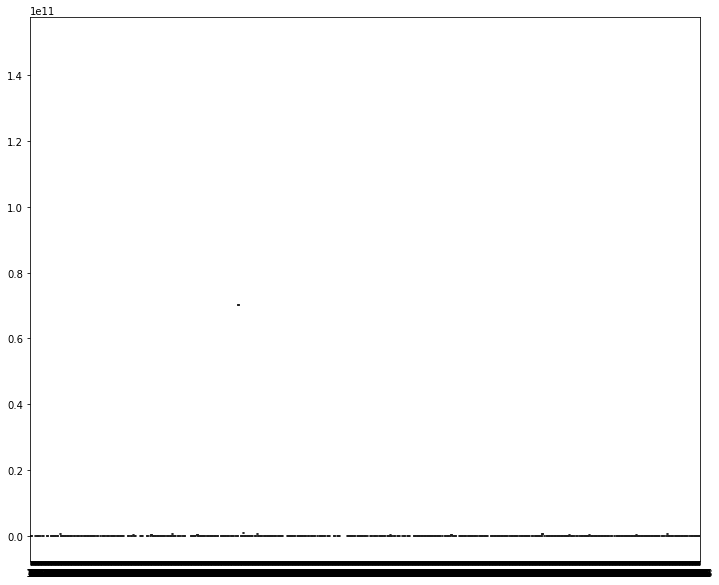

In [29]:
plt.figure(figsize=(12,10))
sns.boxplot(data=Data['Amount($)'],palette='Blues_d')
plt.show()




# Using the simpleImputer to replace NaN values

In [30]:
def replacer(Strategy,column):
    imputer = SimpleImputer(strategy =Strategy, missing_values = np.NaN)
    imputer = imputer.fit(Data[[column]])
    Data[column] = imputer.transform(Data[[column]])
replacer('mean','Amount($)')
replacer('most_frequent','Stage')
replacer('most_frequent','HeadQuarter')
replacer('most_frequent','Sector')
replacer('most_frequent','Founders')
replacer('most_frequent','Investor')
replacer('most_frequent','Founded')


    


    


In [31]:
Data.isnull().sum()

Company/Brand    0
Sector           0
Stage            0
Amount($)        0
HeadQuarter      0
What it does     0
Founded          0
Founders         0
Investor         0
dtype: int64

In [32]:
Data.head(5)

,Company/Brand,Sector,Stage,Amount($),HeadQuarter,What it does,Founded,Founders,Investor
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000.0,Bangalore,"TheCollegeFever is a hub for fun, fiesta and f...",2019.0,"Ashneer Grover, Shashvat Nakrani",Inflection Point Ventures
1,Happy Cow Dairy,"Agriculture, Farming",Seed,480000.0,Mumbai,A startup which aggregates milk from dairy far...,2019.0,"Ashneer Grover, Shashvat Nakrani",Inflection Point Ventures
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,780000.0,Gurgaon,Leading Online Loans Marketplace in India,2019.0,"Ashneer Grover, Shashvat Nakrani",Inflection Point Ventures
3,PayMe India,"Financial Services, FinTech",Angel,2000000.0,Noida,PayMe India is an innovative FinTech organizat...,2019.0,"Ashneer Grover, Shashvat Nakrani",Inflection Point Ventures
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,121210624.0,Hyderabad,Eunimart is a one stop solution for merchants ...,2019.0,"Ashneer Grover, Shashvat Nakrani",Inflection Point Ventures


In [33]:

Data.shape

(2879, 9)

In [34]:
Data['HeadQuarter'].unique()

array(['Bangalore', 'Mumbai', 'Gurgaon', 'Noida', 'Hyderabad',
       'Bengaluru', 'Kalkaji', 'Delhi', 'India', 'Hubli', 'New Delhi',
       'Chennai', 'Mohali', 'Kolkata', 'Pune', 'Jodhpur', 'Kanpur',
       'Ahmedabad', 'Azadpur', 'Haryana', 'Cochin', 'Faridabad', 'Jaipur',
       'Kota', 'Anand', 'Bangalore City', 'Belgaum', 'Thane', 'Margão',
       'Indore', 'Alwar', 'Kannur', 'Trivandrum', 'Ernakulam',
       'Kormangala', 'Uttar Pradesh', 'Andheri', 'Mylapore', 'Ghaziabad',
       'Kochi', 'Powai', 'Guntur', 'Kalpakkam', 'Bhopal', 'Coimbatore',
       'Worli', 'Alleppey', 'Chandigarh', 'Guindy', 'Lucknow',
       'Telangana', 'Gurugram', 'Surat', 'Uttar pradesh', 'Rajasthan',
       'Tirunelveli, Tamilnadu', 'Singapore', 'Gujarat', 'Kerala',
       'Jaipur, Rajastan', 'Frisco, Texas, United States', 'California',
       'Dhingsara, Haryana', 'New York, United States', 'Patna',
       'San Francisco, California, United States',
       'San Francisco, United States', 'San Ramon, C

In [35]:
Data.describe()

,Amount($),Founded
count,2.879000e+03,2879.000000
mean,1.212111e+08,2016.859673
std,3.085232e+09,3.956210
min,9.600000e+00,1963.000000
25%,1.000000e+06,2015.000000
50%,5.200000e+06,2018.000000
75%,9.000000e+07,2019.000000
max,1.500000e+11,2021.000000


# 1. Which company has the highest amount of funds?

In [36]:
top_companies=Data.groupby("Company/Brand")["Amount($)"].sum().reset_index().sort_values(by="Amount($)",ascending=False)
top_companies 

,Company/Brand,Amount($)
70,Alteria Capital,1.500000e+11
1556,Reliance Retail Ventures Ltd,7.000000e+10
1726,Snowflake,3.000000e+09
1553,Reliance,2.200000e+09
1818,Swiggy,1.956000e+09
...,...,...
527,ENLYFT DIGITAL SOLUTIONS PRIVATE LIMITED,2.400000e+03
345,Classworks India,1.200000e+03
1279,Next Digital Solutions,1.200000e+03
1393,Peel Works,4.223000e+01


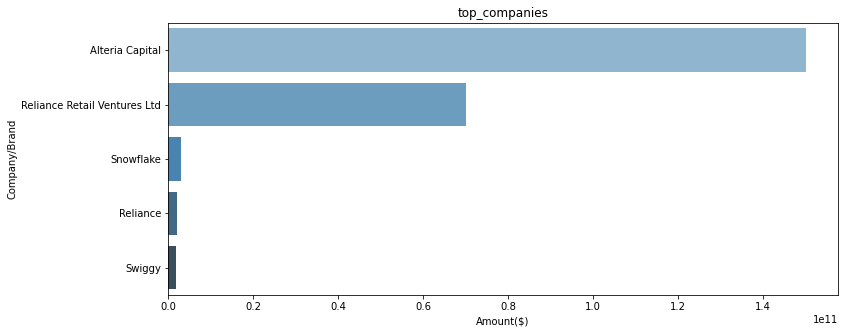

In [37]:
fig = plt.figure(figsize=(12,5))
plt.title("top_companies")
sns.barplot(data=top_companies.iloc[:5] , x="Amount($)", y="Company/Brand", palette='Blues_d')

fig.show()

# 2. Which location has the minimum startup funds?

In [38]:
Location_with_least_amount = Data.groupby("HeadQuarter")["Amount($)"].sum().reset_index().sort_values(by="Amount($)",ascending=True)
Location_with_least_amount

,HeadQuarter,Amount($)
67,Kota,1.200000e+03
61,Kannur,1.440000e+04
29,"Dhingsara, Haryana",1.000000e+05
101,Ranchi,1.000000e+05
91,Panchkula,1.000000e+05
...,...,...
97,Pune,4.909118e+09
43,Gurugram,9.107283e+09
81,New Delhi,9.201621e+09
9,Bangalore,4.707058e+10


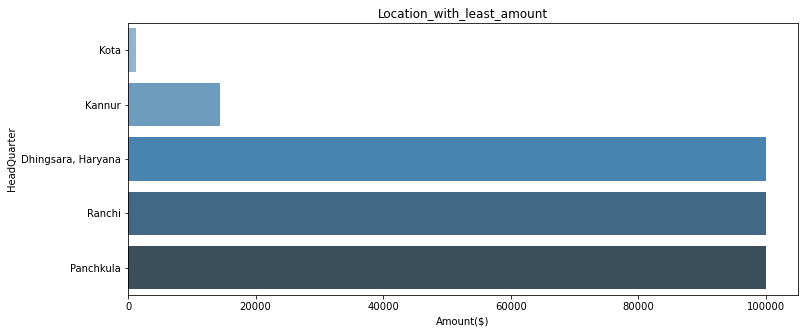

In [39]:
fig = plt.figure(figsize=(12,5))
plt.title("Location_with_least_amount")
sns.barplot(data=Location_with_least_amount.iloc[:5] , x="Amount($)", y="HeadQuarter", palette='Blues_d')
fig.show()

# 3.In which sector has the top 5 investors.

In [40]:
Top_Sectors = Data.groupby("Sector")["Amount($)"].sum().reset_index().sort_values(by="Amount($)",ascending=False).iloc[:5]
Top_Sectors

,Sector,Amount($)
445,FinTech,1.567944e+11
757,Retail,7.078480e+10
385,EdTech,7.028188e+09
394,Edtech,4.335416e+09
374,E-commerce,3.612616e+09


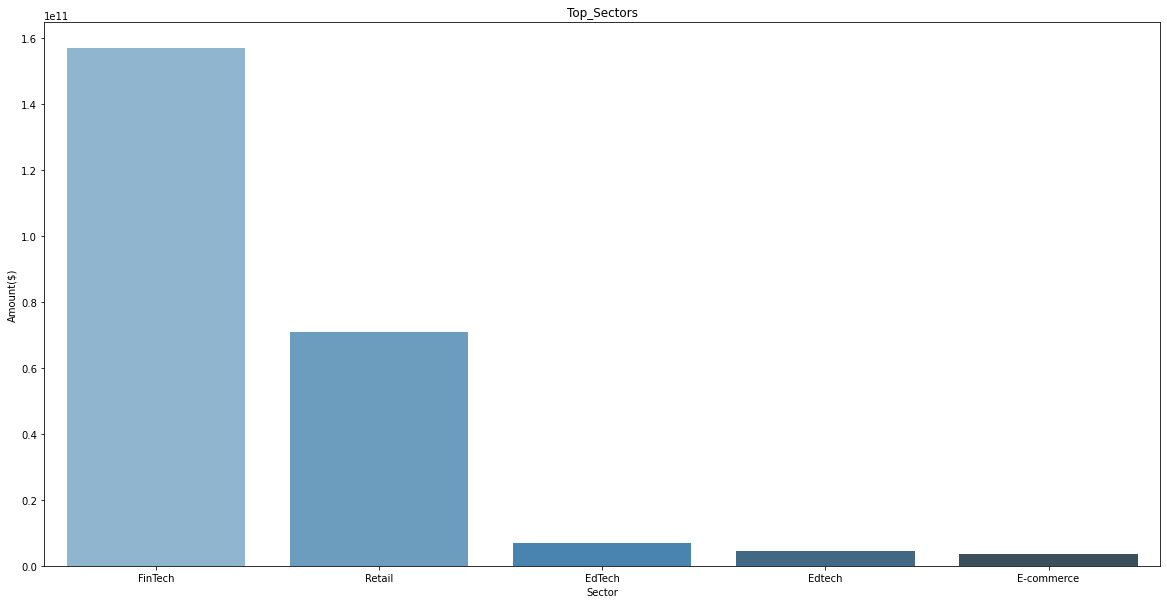

In [41]:
fig = plt.figure(figsize=(20,10))
plt.title("Top_Sectors")
sns.barplot(data=Top_Sectors.iloc[:5] , y="Amount($)", x="Sector", palette='Blues_d')
fig.show()

 # 4. How much did the investors contributed in Delhi and Mumbai?

In [42]:
D1 = Data.iloc[:,[4,3]]
x = ['Delhi','Mumbai']
D2 = D1[D1.HeadQuarter.isin(x)]
D2.groupby("HeadQuarter")["Amount($)"].sum().reset_index().sort_values(by="Amount($)",ascending=False)

,HeadQuarter,Amount($)
1,Mumbai,2.428594e+11
0,Delhi,4.340888e+09


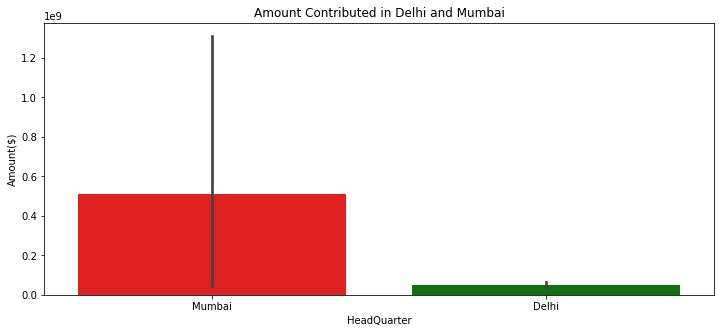

In [43]:
fig = plt.figure(figsize=(12,5))
plt.title("Amount Contributed in Delhi and Mumbai")
sns.barplot(data=D2 , y="Amount($)", x="HeadQuarter", palette=['red','green'])
fig.show()


 # 5. How many companies received an amount Greater than or equal to the average amount?
 

In [44]:

Amount_greater_or_equal = Data.loc[Data['Amount($)'] >= Data['Amount($)'].mean(),['Company/Brand','Amount($)']]
Amount_greater_or_equal.count()

Company/Brand    108
Amount($)        108
dtype: int64

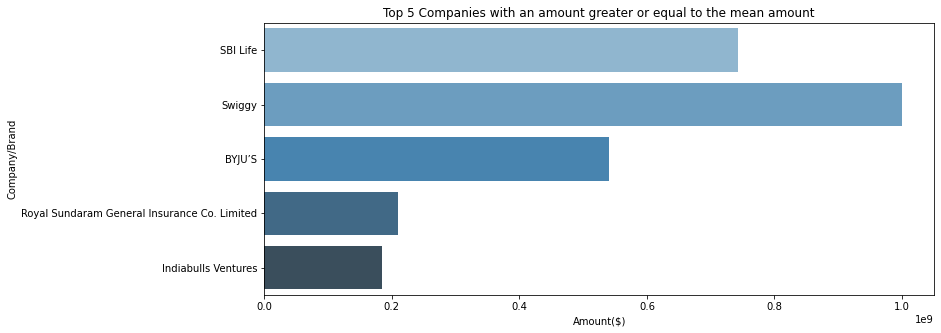

In [45]:
fig = plt.figure(figsize=(12,5))
plt.title("Top 5 Companies with an amount greater or equal to the mean amount")
sns.barplot(data=Amount_greater_or_equal.iloc[:5] , x="Amount($)", y="Company/Brand", palette='Blues_d')
fig.show()

# Univariate Analysis

Categorical Features

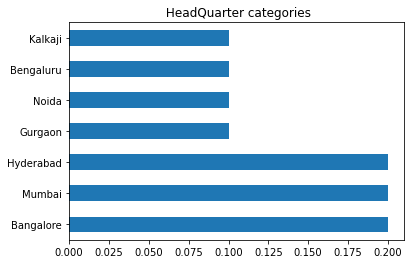

In [46]:
Data['HeadQuarter'].value_counts(normalize=True)

#plot the bar graph of HeadQuarter categories
plt.title(' HeadQuarter categories')
Data['HeadQuarter'].iloc[:10].value_counts(normalize=True).plot.barh()
plt.show()

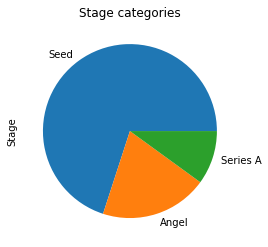

In [47]:
Data['Stage'].value_counts(normalize=True)

#plot pie chart of Stage categories
plt.title('Stage categories')
Data['Stage'].iloc[:10].value_counts(normalize=True).plot.pie()
plt.show()

Numerical Features

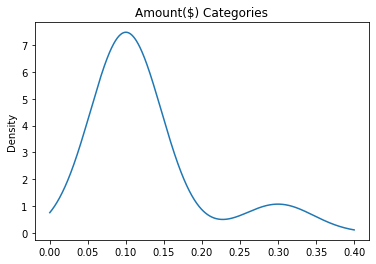

In [48]:
Data['Amount($)'].value_counts(normalize=True)

#plot Kernel density estimate chart of Amount categories
plt.title('Amount($) Categories')
Data['Amount($)'].iloc[:10].value_counts(normalize=True).plot.kde()
plt.show()

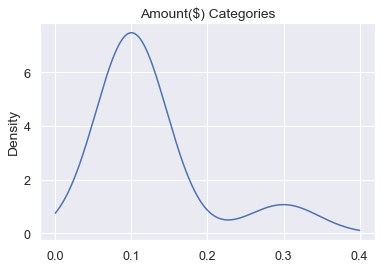

In [88]:
Data['Amount($)'].value_counts(normalize=True)

#plot pie chart of Amount categories
plt.title('Amount($) Categories')
Data['Amount($)'].iloc[:10].value_counts(normalize=True).plot.kde()
plt.show()

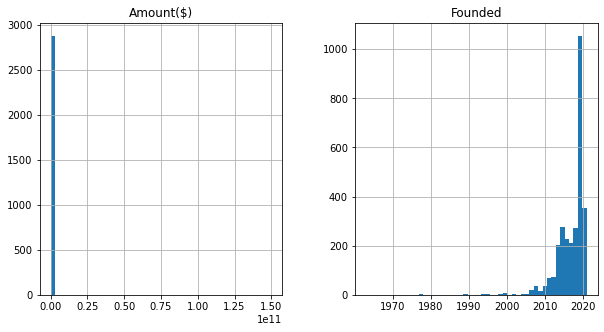

In [50]:
Data.hist(bins = 50, figsize = (10,5))
plt.show()

# Multivariate Analysis

In [86]:
Data.corr()

,Amount($),Founded
Amount($),1.000000,-0.022569
Founded,-0.022569,1.000000


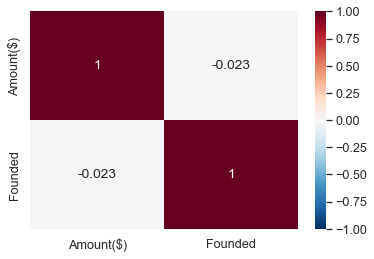

In [90]:
sns.set(font_scale = 1.15)

sns.heatmap(
    Data.corr(),
    cmap = 'RdBu_r',
    annot = True,
    vmin = -1, vmax = 1);

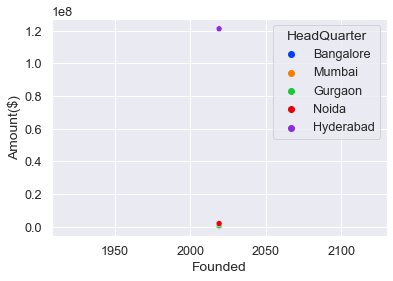

In [101]:
sns.scatterplot(
    y = 'Amount($)',
    x = 'Founded',
    data = Data.iloc[:5],
    palette = 'bright',
    hue = 'HeadQuarter');

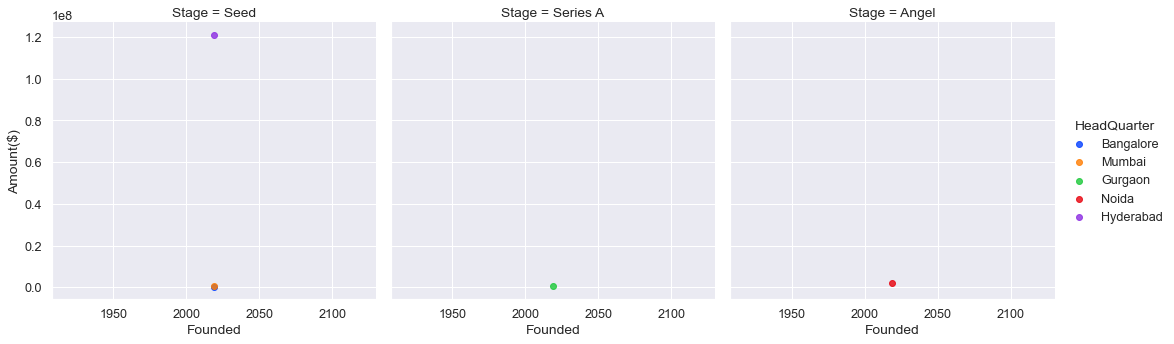

In [103]:
sns.lmplot(
    y = 'Amount($)',
    x = 'Founded',
    data = Data.iloc[:5],
    palette = 'bright',
    col = 'Stage',
    hue = 'HeadQuarter');

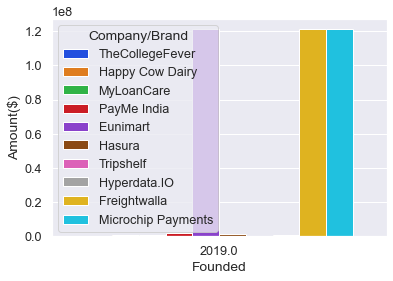

In [109]:
sns.barplot(
    y = 'Amount($)',
    x = 'Founded',
    data = Data.iloc[:10],
    palette = 'bright',
    hue = 'Company/Brand');

# Feature processing

Clean and process the dataset

# Missing Values

Finding the NaN values using Scikif-learn SimpleImputer

In [60]:
def replacer(Strategy,column):
    imputer = SimpleImputer(strategy =Strategy, missing_values = np.NaN)
    imputer = imputer.fit(Data[[column]])
    Data[column] = imputer.transform(Data[[column]])
replacer('mean','Amount($)')
replacer('most_frequent','Stage')
replacer('most_frequent','HeadQuarter')
replacer('most_frequent','Sector')
replacer('most_frequent','Founders')
replacer('most_frequent','Investor')
replacer('most_frequent','Founded')



# Scaling 

Scale the numerical features using the Scikif-learn Standard Scaler

In [77]:
scaler = MinMaxScaler()
array = scaler.fit_transform(Data[['Founded','Amount($)']])
array

array([[9.65517241e-01, 1.66660275e-06],
       [9.65517241e-01, 3.19993615e-06],
       [9.65517241e-01, 5.19993625e-06],
       ...,
       [9.65517241e-01, 3.66666620e-04],
       [8.96551724e-01, 1.73333278e-04],
       [9.65517241e-01, 5.33332719e-05]])

In [75]:
pd.DataFrame(array,columns = ['Amount($)','Founded'])

,Amount($),Founded
0,0.965517,0.000002
1,0.965517,0.000003
2,0.965517,0.000005
3,0.965517,0.000013
4,0.965517,0.000808
...,...,...
2874,0.965517,0.000020
2875,0.896552,0.000133
2876,0.965517,0.000367
2877,0.896552,0.000173


In [71]:
array.shape

(2879, 2)

In [72]:
Data.shape

(2879, 9)

# Encoding

Encode the categorical Dataset using OneHotEncoder

In [64]:
Data.keys()

Index(['Company/Brand', 'Sector', 'Stage', 'Amount($)', 'HeadQuarter',
       'What it does', 'Founded', 'Founders', 'Investor'],
      dtype='object')

In [83]:
df2 = pd.get_dummies(data = Data, columns = ['Company/Brand', 'Sector', 'Stage', 'HeadQuarter','What it does', 'Founders', 'Investor'])
df2.columns

Index(['Amount($)', 'Founded', 'Company/Brand_&ME', 'Company/Brand_1Bridge',
       'Company/Brand_1Crowd', 'Company/Brand_1K Kirana Bazaar',
       'Company/Brand_1MG', 'Company/Brand_21K School', 'Company/Brand_3SC',
       'Company/Brand_3one4 Capital',
       ...
       'Investor_growX ventures', 'Investor_growX ventures, Sangam Ventures',
       'Investor_growX ventures, Venture Gurukool', 'Investor_http://100x.vc/',
       'Investor_iSeed, Titan Capital', 'Investor_pi Ventures',
       'Investor_responsAbility Investments, Blue Orchard',
       'Investor_responsAbility, Accel',
       'Investor_responsAbility, Grameen Impact India (GIII)',
       'Investor_velocity.in'],
      dtype='object', length=9753)

In [84]:
df2.sample(5)

,Amount($),Founded,Company/Brand_&ME,Company/Brand_1Bridge,Company/Brand_1Crowd,Company/Brand_1K Kirana Bazaar,Company/Brand_1MG,Company/Brand_21K School,Company/Brand_3SC,Company/Brand_3one4 Capital,...,Investor_growX ventures,"Investor_growX ventures, Sangam Ventures","Investor_growX ventures, Venture Gurukool",Investor_http://100x.vc/,"Investor_iSeed, Titan Capital",Investor_pi Ventures,"Investor_responsAbility Investments, Blue Orchard","Investor_responsAbility, Accel","Investor_responsAbility, Grameen Impact India (GIII)",Investor_velocity.in
89,2000000.0,2017.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,121210624.0,2019.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
248,6000000.0,2020.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
940,250000.0,2019.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
563,10000000.0,2015.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [85]:
df2.shape

(2879, 9753)